TensorFlow

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# 加載 MNIST 資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 資料標準化
x_train = x_train / 255.0
x_test = x_test / 255.0

# 資料格式轉換 (增加通道維度，供 CNN 使用)
x_train_cnn = x_train[..., tf.newaxis]
x_test_cnn = x_test[..., tf.newaxis]

# 將標籤進行 One-Hot 編碼
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


Dense NN

In [ ]:
def build_dense_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # 將 28x28 圖片平展為一維
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')  # 10 個分類
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


dense_model = build_dense_model()

# 設置 EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 訓練模型
history_dense = dense_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping]
)

# 評估模型
test_loss, test_accuracy = dense_model.evaluate(x_test, y_test)
print(f"Dense NN Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8241 - loss: 0.5617 - val_accuracy: 0.9598 - val_loss: 0.1285
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9512 - loss: 0.1617 - val_accuracy: 0.9688 - val_loss: 0.1020
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9651 - loss: 0.1155 - val_accuracy: 0.9762 - val_loss: 0.0770
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9715 - loss: 0.0973 - val_accuracy: 0.9768 - val_loss: 0.0769
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9719 - loss: 0.0876 - val_accuracy: 0.9775 - val_loss: 0.0713
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9763 - loss: 0.0759 - val_accuracy: 0.9778 - val_loss: 0.0719
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9792 - loss: 0.0627 - val_accuracy: 0.9797 - val_loss: 0.0711
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0589 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


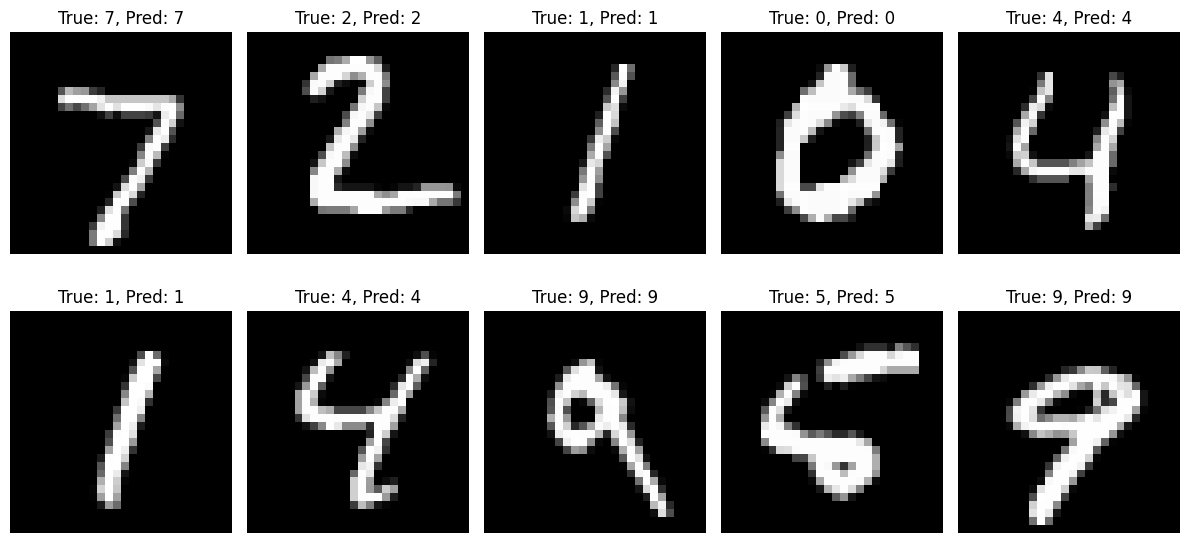

In [ ]:
def show_predictions_dnn(model, x_test, y_test, num_images=10):
    # 不需要展平，直接使用原始輸入形狀
    predictions = model.predict(x_test)
    predicted_labels = np.argmax(predictions, axis=1)  # 預測的類別
    true_labels = np.argmax(y_test, axis=1)  # 實際的類別

    # 顯示圖片和預測結果
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i], cmap='gray')  # 顯示圖片
        plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 顯示 DNN 模型預測結果
show_predictions_dnn(dense_model, x_test, y_test)

CNN

In [ ]:
def build_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')  # 10 個分類
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = build_cnn_model()

# 設置 EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 訓練模型
history_cnn = cnn_model.fit(
    x_train_cnn, y_train,
    validation_data=(x_test_cnn, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping]
)

# 評估模型
test_loss, test_accuracy = cnn_model.evaluate(x_test_cnn, y_test)
print(f"CNN Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8405 - loss: 0.4972 - val_accuracy: 0.9852 - val_loss: 0.0508
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9738 - loss: 0.0855 - val_accuracy: 0.9897 - val_loss: 0.0329
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9792 - loss: 0.0663 - val_accuracy: 0.9912 - val_loss: 0.0288
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9834 - loss: 0.0533 - val_accuracy: 0.9916 - val_loss: 0.0246
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9870 - loss: 0.0423 - val_accuracy: 0.9908 - val_loss: 0.0281
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0393 - val_accuracy: 0.9923 - val_loss: 0.0231
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9917 - val_loss: 0.0274
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9889 - loss: 0.0341 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


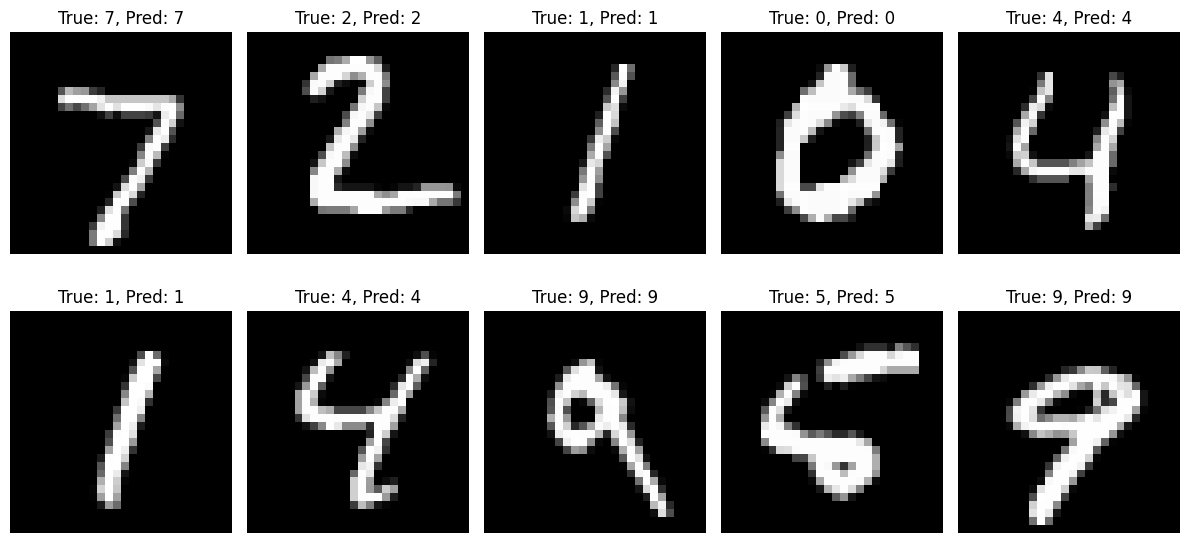

In [ ]:
def show_predictions_cnn(model, x_test, y_test, num_images=10):
    # 使用 CNN 模型直接進行預測
    predictions = model.predict(x_test)
    predicted_labels = np.argmax(predictions, axis=1)  # 預測的類別
    true_labels = np.argmax(y_test, axis=1)  # 實際的類別

    # 顯示圖片和預測結果
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].squeeze(), cmap='gray')  # 顯示圖片
        plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 顯示 CNN 模型預測結果
show_predictions_cnn(cnn_model, x_test_cnn, y_test)

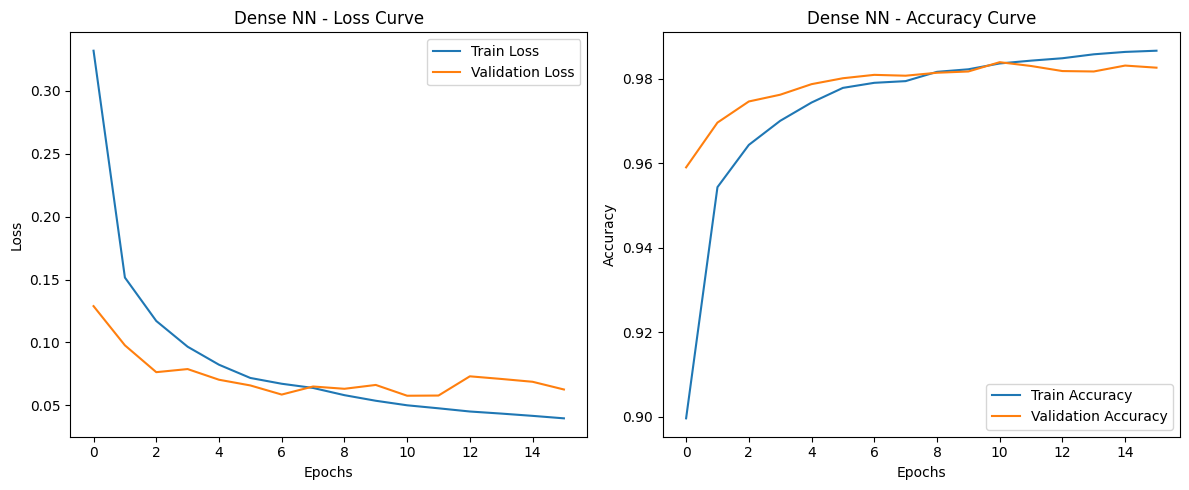

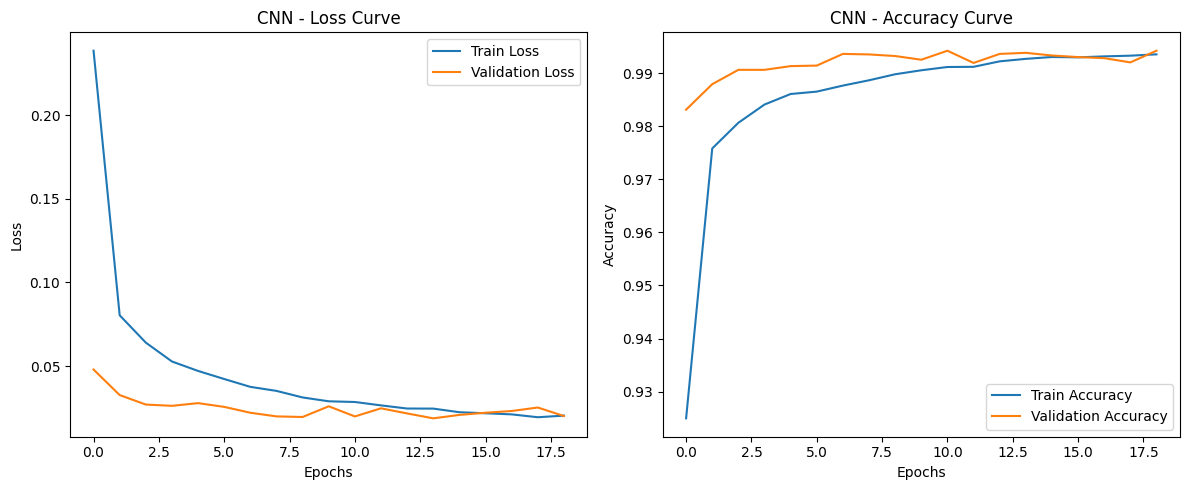

In [ ]:
def plot_history(history, title):
    # 繪製損失曲線
    plt.figure(figsize=(12, 5))

    # 損失
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{title} - Loss Curve")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 準確度
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{title} - Accuracy Curve")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 繪製 Dense NN 的訓練曲線
plot_history(history_dense, "Dense NN")

# 繪製 CNN 的訓練曲線
plot_history(history_cnn, "CNN")


PyTorch

In [ ]:
!pip install torch torchvision matplotlib

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 定義資料轉換與標準化
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 將像素值縮放到 [-1, 1]
])

# 加載 MNIST 資料集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 351kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.77MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.90MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Dense NN

In [ ]:
class DenseNN(nn.Module):
    def __init__(self, input_size=28*28, num_classes=10):
        super(DenseNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 平展圖片到 1D
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_model(model, train_loader, optimizer, criterion, num_epochs=10):
    train_loss = []
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        train_loss.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")
    return train_loss

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

# 初始化 Dense NN 模型
dense_model = DenseNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dense_model.parameters(), lr=0.001)

# 訓練 Dense NN
dense_train_loss = train_model(dense_model, train_loader, optimizer, criterion, num_epochs=10)

# 評估 Dense NN
evaluate_model(dense_model, test_loader)


Epoch [1/10], Loss: 0.3800
Epoch [2/10], Loss: 0.2028
Epoch [3/10], Loss: 0.1694
Epoch [4/10], Loss: 0.1445
Epoch [5/10], Loss: 0.1370
Epoch [6/10], Loss: 0.1198
Epoch [7/10], Loss: 0.1131
Epoch [8/10], Loss: 0.1067
Epoch [9/10], Loss: 0.1001
Epoch [10/10], Loss: 0.0990
Test Accuracy: 97.58%


97.58

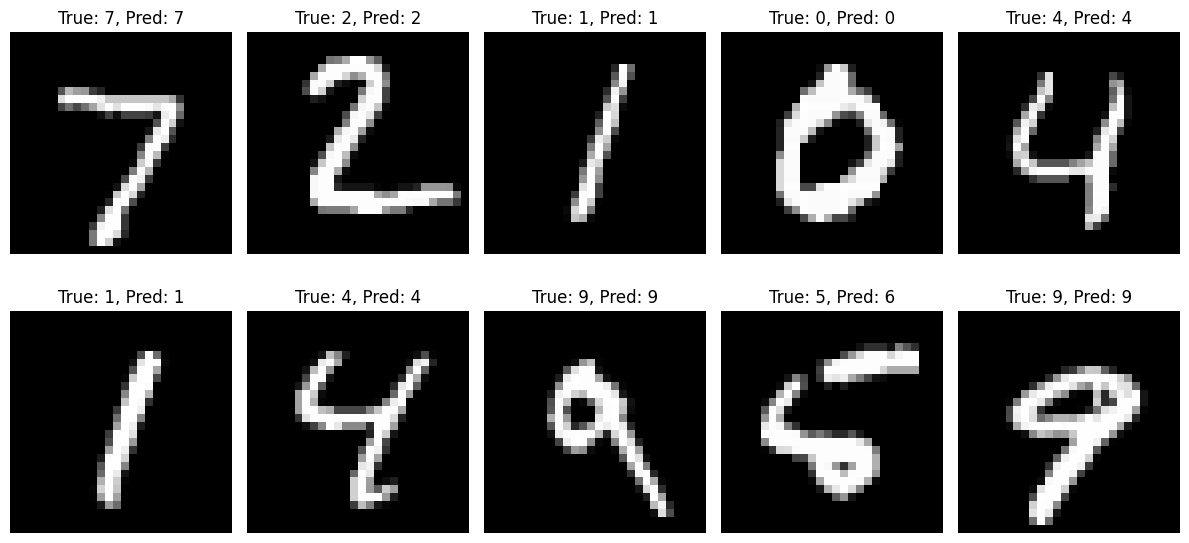

In [ ]:
def show_predictions_dnn(model, test_loader, num_images=10):
    model.eval()
    images, labels = next(iter(test_loader))  # 取得一個批次的數據
    outputs = model(images.view(images.size(0), -1))  # 將圖片展平
    _, predictions = torch.max(outputs, 1)  # 預測數字

    # 繪製圖片
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # 顯示圖片
        plt.title(f"True: {labels[i].item()}, Pred: {predictions[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 使用訓練好的 DNN 模型顯示預測結果
show_predictions_dnn(dense_model, test_loader)


CNN

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Conv1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Conv2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Pooling Layer
        self.dropout = nn.Dropout(0.3)  # Dropout

        # 計算展平大小
        self.feature_size = self._get_conv_output_size((1, 28, 28))

        # 全連接層
        self.fc1 = nn.Linear(self.feature_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output_size(self, input_shape):
        """計算卷積層的展平大小"""
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)  # 假設一個虛擬輸入
            x = self.pool(F.relu(self.conv1(x)))  # Conv1 + Pool
            x = self.pool(F.relu(self.conv2(x)))  # Conv2 + Pool
            return x.view(1, -1).size(1)  # 展平後的大小

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Conv1
        x = self.pool(x)  # Pool after Conv1
        print(f"Shape after Conv1 and Pooling: {x.shape}")  # 檢查形狀

        x = F.relu(self.conv2(x))  # Conv2
        x = self.pool(x)  # Pool after Conv2
        print(f"Shape after Conv2 and Pooling: {x.shape}")  # 檢查形狀

        x = x.view(x.size(0), -1)  # 展平
        print(f"Shape after flatten: {x.shape}")  # 檢查形狀

        x = F.relu(self.fc1(x))  # FC1
        x = self.dropout(x)  # Dropout
        x = self.fc2(x)  # FC2
        return x

# 初始化 CNN 模型
cnn_model = CNN()

# 測試一個批次的數據，檢查形狀
for inputs, _ in train_loader:
    outputs = cnn_model(inputs)
    break  # 只檢查一個批次的形狀

# 設定損失函數與優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# 訓練 CNN 模型
cnn_train_loss = train_model(cnn_model, train_loader, optimizer, criterion, num_epochs=10)

# 評估 CNN 模型
evaluate_model(cnn_model, test_loader)

串流輸出內容已截斷至最後 5000 行。
Shape after Conv2 and Pooling: torch.Size([64, 64, 7, 7])
Shape after flatten: torch.Size([64, 3136])
Shape after Conv1 and Pooling: torch.Size([64, 32, 14, 14])
Shape after Conv2 and Pooling: torch.Size([64, 64, 7, 7])
Shape after flatten: torch.Size([64, 3136])
Shape after Conv1 and Pooling: torch.Size([64, 32, 14, 14])
Shape after Conv2 and Pooling: torch.Size([64, 64, 7, 7])
Shape after flatten: torch.Size([64, 3136])
Shape after Conv1 and Pooling: torch.Size([64, 32, 14, 14])
Shape after Conv2 and Pooling: torch.Size([64, 64, 7, 7])
Shape after flatten: torch.Size([64, 3136])
Shape after Conv1 and Pooling: torch.Size([64, 32, 14, 14])
Shape after Conv2 and Pooling: torch.Size([64, 64, 7, 7])
Shape after flatten: torch.Size([64, 3136])
Shape after Conv1 and Pooling: torch.Size([64, 32, 14, 14])
Shape after Conv2 and Pooling: torch.Size([64, 64, 7, 7])
Shape after flatten: torch.Size([64, 3136])
Shape after Conv1 and Pooling: torch.Size([64, 32, 14, 14])
Shape a

99.11

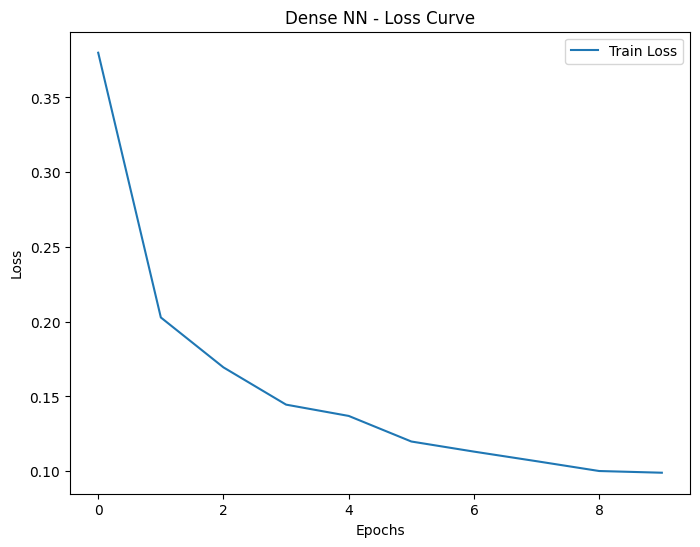

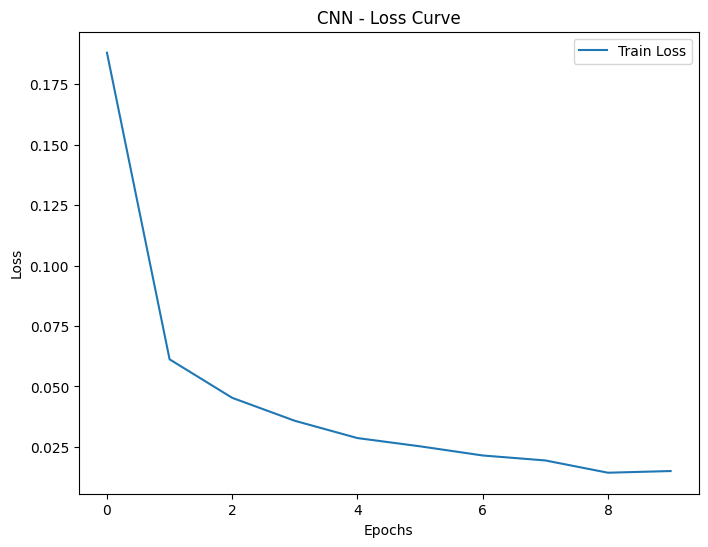

In [ ]:
# 繪製損失曲線
def plot_loss(train_loss, title):
    plt.figure(figsize=(8, 6))
    plt.plot(train_loss, label='Train Loss')
    plt.title(f'{title} - Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 繪製 Dense NN 的損失曲線
plot_loss(dense_train_loss, "Dense NN")

# 繪製 CNN 的損失曲線
plot_loss(cnn_train_loss, "CNN")


Shape after Conv1 and Pooling: torch.Size([64, 32, 14, 14])
Shape after Conv2 and Pooling: torch.Size([64, 64, 7, 7])
Shape after flatten: torch.Size([64, 3136])


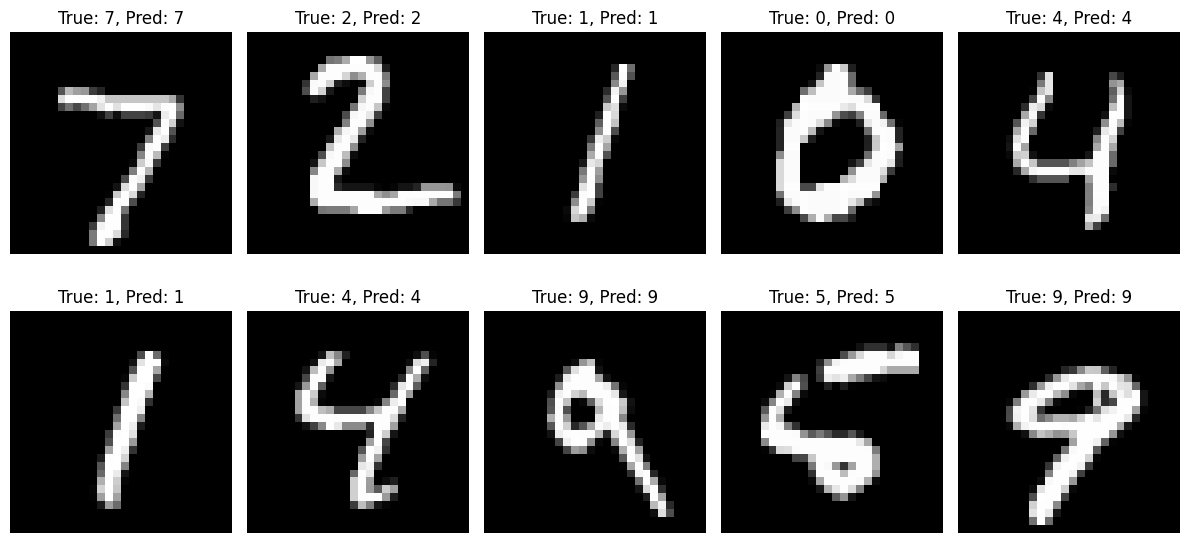

In [ ]:
# 顯示測試圖片和預測結果
def show_predictions(model, test_loader, num_images=10):
    model.eval()
    images, labels = next(iter(test_loader))  # 取得一個批次的數據
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)  # 預測數字

    # 繪製圖片
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # 顯示圖片
        plt.title(f"True: {labels[i].item()}, Pred: {predictions[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 使用訓練好的模型顯示預測結果
show_predictions(cnn_model, test_loader)

PyTorch Lightning

In [ ]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 37.4 MB/s eta 0:00:00


In [ ]:
import torch
import pytorch_lightning as pl
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 資料加載與處理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# 加載 MNIST 資料集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.87MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Dense NN

In [ ]:
class DenseNN(pl.LightningModule):
    def __init__(self, input_size=28*28, num_classes=10):
        super(DenseNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 平展圖片到 1D
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = F.cross_entropy(outputs, targets)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = F.cross_entropy(outputs, targets)
        acc = (outputs.argmax(dim=1) == targets).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

dense_model = DenseNN()
trainer = pl.Trainer(max_epochs=5, accelerator='auto', log_every_n_steps=1)
trainer.fit(dense_model, train_dataloaders=train_loader, val_dataloaders=test_loader)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | fc1     | Linear  | 200 K  | train
1 | fc2     | Linear  | 32.9 K | train
2 | fc3     | Linear  | 1.3 K  | train
3 | dropout | Dropout | 0      | train
--------------------------------------------
235 K     Trainable params
0         Non-trainable params
235 K     Total params
0.941     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


CNN

In [ ]:
class CNN(pl.LightningModule):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Conv1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Conv2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Pooling Layer
        self.dropout = nn.Dropout(0.3)  # Dropout

        # 計算展平大小
        self.feature_size = self._get_conv_output_size((1, 28, 28))

        # 全連接層
        self.fc1 = nn.Linear(self.feature_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output_size(self, input_shape):
        """計算卷積層的展平大小"""
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)  # 假設一個虛擬輸入
            x = self.pool(F.relu(self.conv1(x)))  # Conv1 + Pool
            x = self.pool(F.relu(self.conv2(x)))  # Conv2 + Pool
            print(f"Feature map size after conv layers: {x.shape}")  # 檢查形狀
            return x.view(1, -1).size(1)  # 展平後的大小

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Conv1
        x = self.pool(x)  # Pool after Conv1
        x = F.relu(self.conv2(x))  # Conv2
        x = self.pool(x)  # Pool after Conv2
        x = x.view(x.size(0), -1)  # 展平
        x = F.relu(self.fc1(x))  # FC1
        x = self.dropout(x)  # Dropout
        x = self.fc2(x)  # FC2
        return x

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = F.cross_entropy(outputs, targets)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = F.cross_entropy(outputs, targets)
        acc = (outputs.argmax(dim=1) == targets).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

cnn_model = CNN()

trainer = pl.Trainer(max_epochs=5, accelerator='auto', log_every_n_steps=1)
trainer.fit(cnn_model, train_dataloaders=train_loader, val_dataloaders=test_loader)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type      | Params | Mode 
----------------------------------------------
0 | conv1   | Conv2d    | 320    | train
1 | conv2   | Conv2d    | 18.5 K | train
2 | pool    | MaxPool2d | 0      | train
3 | dropout | Dropout   | 0      | train
4 | fc1     | Linear    | 401 K  | train
5 | fc2     | Linear    | 1.3 K  | train
----------------------------------------------
421 K     Trainable params
0         Non-trainable params
421 K     Total params
1.687     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Feature map size after conv layers: torch.Size([1, 64, 7, 7])


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


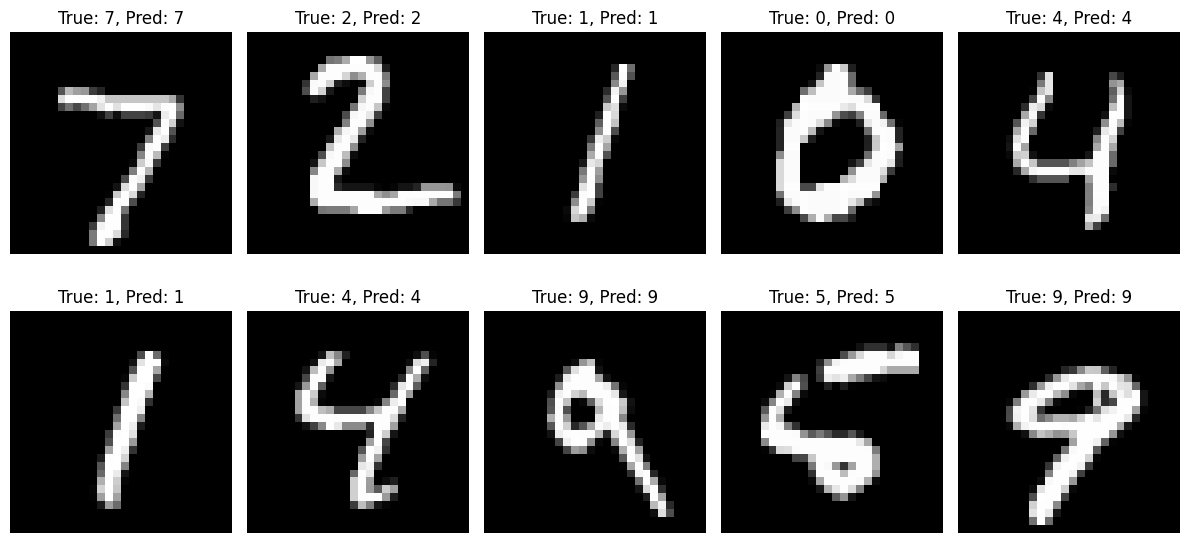

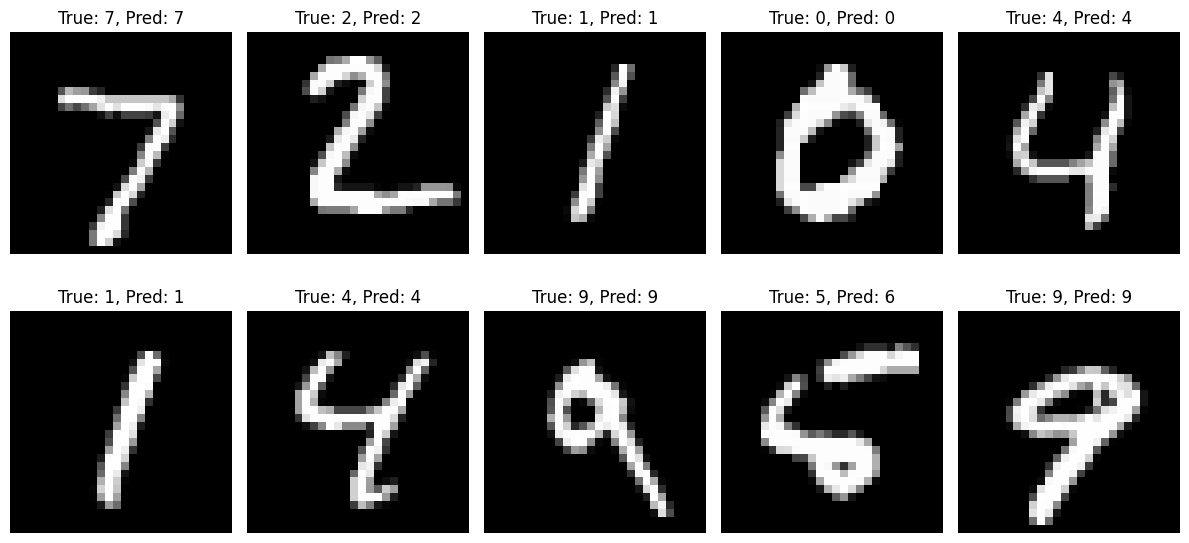

In [ ]:
def show_predictions(model, test_loader, num_images=10):
    model.eval()
    images, labels = next(iter(test_loader))  # 取得一個批次的數據
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)  # 預測數字

    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # 顯示圖片
        plt.title(f"True: {labels[i].item()}, Pred: {predictions[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 顯示 Dense NN 預測結果
show_predictions(dense_model, test_loader)

# 顯示 CNN 預測結果
show_predictions(cnn_model, test_loader)
